In [1]:
pip install transformers[torch] datasets

In [2]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
import torch
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset, random_split

In [4]:
from datasets import load_dataset

#sadness (0), joy (1), love (2), anger (3), fear (4), surprise (5).

# Replace 'emotion' with the name of the emotion dataset you want to load
dataset_name = 'emotion'

# Load the emotion dataset
emotion_dataset = load_dataset(dataset_name)

# Access the train split of the dataset
train_dataset = emotion_dataset['train']
test_dataset = emotion_dataset['test']

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Access the text and label columns from the train split
emotion_train_texts = train_dataset['text']
emotion_train_labels = train_dataset['label']

# Access the text and label columns from the test split
emotion_test_texts = test_dataset['text']
emotion_test_labels = test_dataset['label']

# Create a pipeline with CountVectorizer and Multinomial Naive Bayes
nb_pipeline = make_pipeline(CountVectorizer(), MultinomialNB())

# Fit the pipeline on the training data
nb_pipeline.fit(emotion_train_texts, emotion_train_labels)

# Predict on the test data
nb_predictions = nb_pipeline.predict(emotion_test_texts)

# Evaluate the Naive Bayes model
nb_accuracy = accuracy_score(emotion_test_labels, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)

# Additional evaluation metrics
print("\nClassification Report:\n", classification_report(emotion_test_labels, nb_predictions))
print("\nConfusion Matrix:\n", confusion_matrix(emotion_test_labels, nb_predictions))

Naive Bayes Accuracy: 0.7655

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.94      0.83       581
           1       0.74      0.97      0.84       695
           2       0.95      0.23      0.37       159
           3       0.92      0.57      0.70       275
           4       0.82      0.53      0.64       224
           5       0.00      0.00      0.00        66

    accuracy                           0.77      2000
   macro avg       0.69      0.54      0.56      2000
weighted avg       0.77      0.77      0.73      2000


Confusion Matrix:
 [[546  29   0   2   4   0]
 [ 16 674   2   1   2   0]
 [ 27  91  36   4   1   0]
 [ 66  46   0 156   7   0]
 [ 59  39   0   7 119   0]
 [ 21  32   0   0  13   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader
import torch

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# Tokenize and convert tokens into numerical features
def tokenize_and_convert_to_features(texts, labels, max_length=128):
    tokenized_data = tokenizer(texts, truncation=True, padding=True, max_length=max_length, return_tensors='pt')
    input_ids = tokenized_data['input_ids']
    attention_mask = tokenized_data['attention_mask']

    labels = torch.tensor(labels)

    return input_ids, attention_mask, labels

# Tokenize and convert the training data
input_ids_train, attention_mask_train, labels_train = tokenize_and_convert_to_features(emotion_train_texts, emotion_train_labels)

# Tokenize and convert the test data
input_ids_test, attention_mask_test, labels_test = tokenize_and_convert_to_features(emotion_test_texts, emotion_test_labels)

# Create DataLoader for training and test data
train_data = list(zip(input_ids_train, attention_mask_train, labels_train))
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

test_data = list(zip(input_ids_test, attention_mask_test, labels_test))
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Training and evaluation using BERT is typically done using a deep learning framework (e.g., PyTorch or TensorFlow)
# You may need to write additional code for training and evaluation based on your specific requirements.
# This example provides a basic setup for tokenization and data loading using transformers.

(…)cased/resolve/main/tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

(…)bert-base-uncased/resolve/main/vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

(…)base-uncased/resolve/main/tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

(…)rt-base-uncased/resolve/main/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


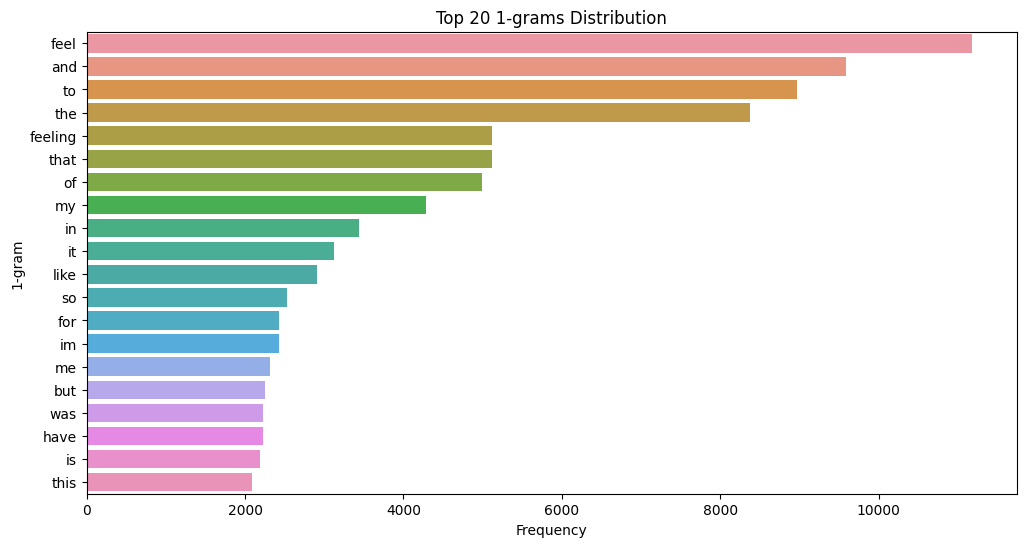

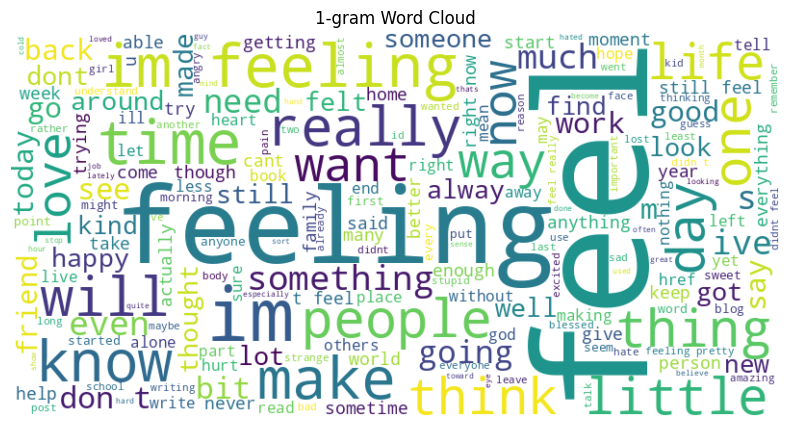

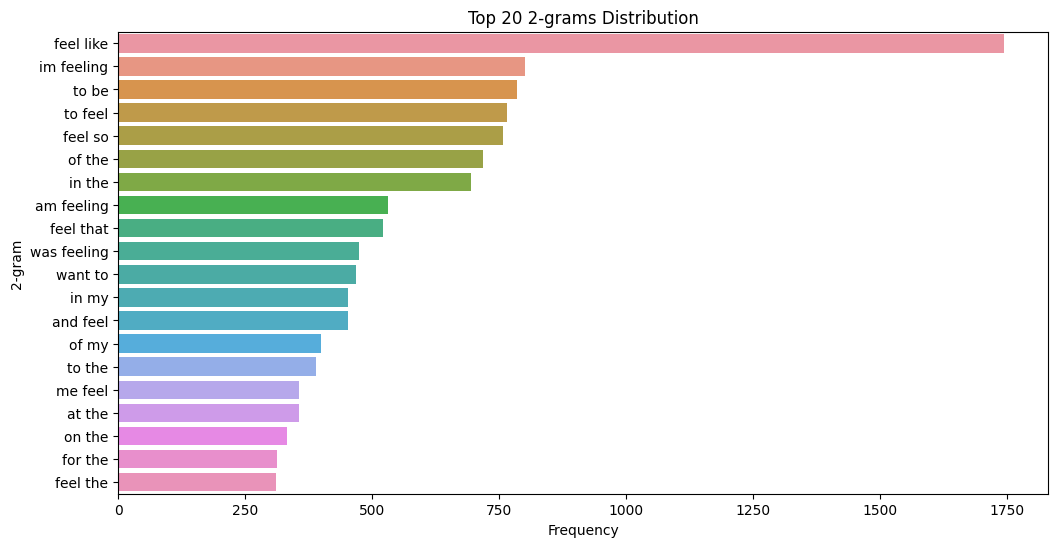

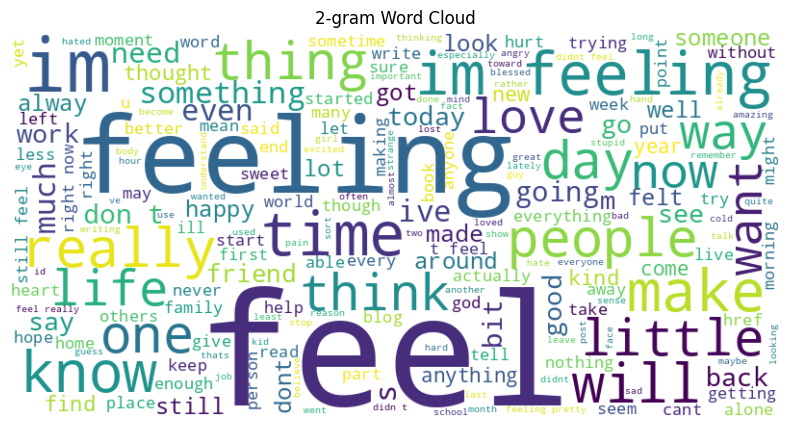

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import pandas as pd

# N-gram distribution analysis
def ngram_distribution_analysis(texts, n=2):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngrams = vectorizer.fit_transform(texts)
    ngrams_sum = ngrams.sum(axis=0)
    ngram_freq = [(word, ngrams_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    ngram_freq = sorted(ngram_freq, key=lambda x: x[1], reverse=True)
    return ngram_freq

# Detailed visualization for unigrams and bigrams
def visualize_ngram_distributions(texts, n=2, top_n=20):
    ngram_freq = ngram_distribution_analysis(texts, n)
    df_ngrams = pd.DataFrame(ngram_freq, columns=[f'{n}-gram', 'Frequency'])

    # Bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Frequency', y=f'{n}-gram', data=df_ngrams.head(top_n))
    plt.title(f'Top {top_n} {n}-grams Distribution')
    plt.xlabel('Frequency')
    plt.ylabel(f'{n}-gram')
    plt.show()

    # Word cloud
    text_combined = ' '.join(texts)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{n}-gram Word Cloud')
    plt.show()

# Example usage for unigrams (n=1)
visualize_ngram_distributions(emotion_train_texts, n=1)

# Example usage for bigrams (n=2)
visualize_ngram_distributions(emotion_train_texts, n=2)

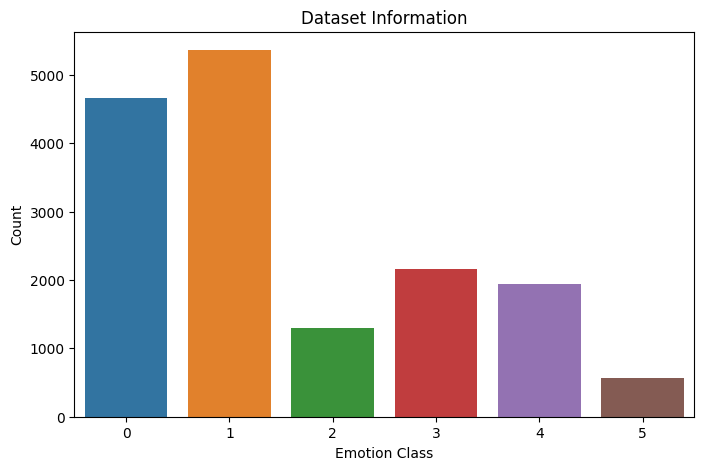

In [9]:
# Visualize dataset information
def visualize_dataset_info(dataset):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=dataset['label'])
    plt.title('Dataset Information')
    plt.xlabel('Emotion Class')
    plt.ylabel('Count')
    plt.show()

# Example usage for dataset information
visualize_dataset_info(train_dataset)

Fine-tuning last few layers of Pre-trained BERT Model

In [3]:

from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def compute_metrics(pred):
    labels = pred.label_ids
    logits = pred.predictions[0]  # Extract logits
    preds = logits.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }


# Load the dataset
dataset = load_dataset('emotion')

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bhadresh-savani/bert-base-uncased-emotion')

# Function to tokenize the data
def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True, max_length=64)

# Apply tokenization to all splits
tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Load BERT model
model = BertForSequenceClassification.from_pretrained(
    'bhadresh-savani/bert-base-uncased-emotion',
    num_labels=len(dataset['train'].features['label'].names),
    output_attentions=True,
    output_hidden_states=False,
)

# Freeze all the parameters
for param in model.base_model.parameters():
    param.requires_grad = False

# Unfreeze the last few layers
for param in model.base_model.encoder.layer[-2:].parameters():
    param.requires_grad = True

# Training Arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=32,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()
#train_results = trainer.evaluate(tokenized_datasets['train'])
#print(train_results)


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

(…)otion/resolve/main/tokenizer_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

(…)e-uncased-emotion/resolve/main/vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

(…)ion/resolve/main/special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

(…)ased-emotion/resolve/main/tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

(…)uncased-emotion/resolve/main/config.json:   0%|          | 0.00/935 [00:00<?, ?B/s]

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Step,Training Loss
10,0.035100
20,0.043100
30,0.069100
40,0.055200
50,0.037000
60,0.078600
70,0.079700
80,0.049500
90,0.044100
100,0.046300


TrainOutput(global_step=1500, training_loss=0.055423408557971315, metrics={'train_runtime': 241.0844, 'train_samples_per_second': 199.1, 'train_steps_per_second': 6.222, 'total_flos': 1578723028992000.0, 'train_loss': 0.055423408557971315, 'epoch': 3.0})

In [4]:
import numpy as np
predictions=trainer.predict(tokenized_datasets['test'])
predicted_labels = np.argmax(predictions.predictions[0], axis=-1)
actual_labels = predictions.label_ids

In [5]:
correctly_predicted_docs = []
incorrectly_predicted_docs = []

for i in range(len(actual_labels)):
    if predicted_labels[i] == actual_labels[i]:
        correctly_predicted_docs.append(dataset['test']['text'][i])
    else:
        incorrectly_predicted_docs.append(dataset['test']['text'][i])

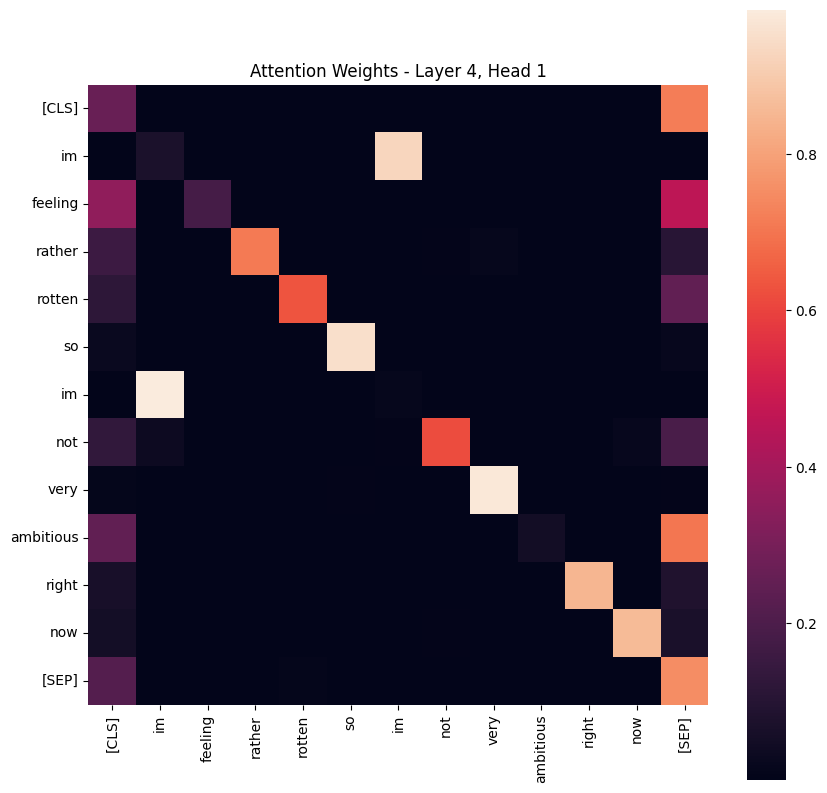

In [7]:
inputs = tokenizer(correctly_predicted_docs[0], return_tensors="pt", max_length=64, padding=True, truncation=True)
outputs = model(**inputs.to("cuda"))
attention = outputs[-1]  # The attentions are the last output of the model
import matplotlib.pyplot as plt
import seaborn as sns

# Choose which layer and head to visualize
layer = 3
head = 0

# Get the attention weights for the specified layer and head
attention_weights = attention[layer][0, head].cpu().detach().numpy()

# Set up labels for each token
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

# Plot
plt.figure(figsize=(10, 10))
sns.heatmap(attention_weights, xticklabels=tokens, yticklabels=tokens, square=True)
plt.title(f'Attention Weights - Layer {layer + 1}, Head {head + 1}')
plt.show()


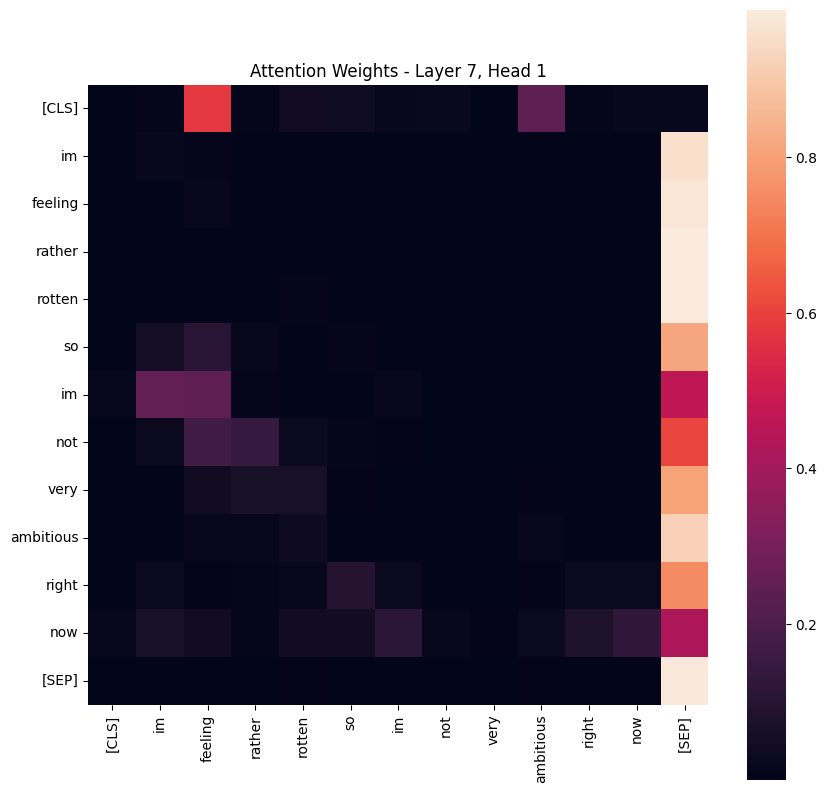

In [8]:
inputs = tokenizer(correctly_predicted_docs[0], return_tensors="pt", max_length=64, padding=True, truncation=True)
outputs = model(**inputs.to("cuda"))
attention = outputs[-1]  # The attentions are the last output of the model
import matplotlib.pyplot as plt
import seaborn as sns

# Choose which layer and head to visualize
layer = 6
head = 0

# Get the attention weights for the specified layer and head
attention_weights = attention[layer][0, head].cpu().detach().numpy()

# Set up labels for each token
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

# Plot
plt.figure(figsize=(10, 10))
sns.heatmap(attention_weights, xticklabels=tokens, yticklabels=tokens, square=True)
plt.title(f'Attention Weights - Layer {layer + 1}, Head {head + 1}')
plt.show()


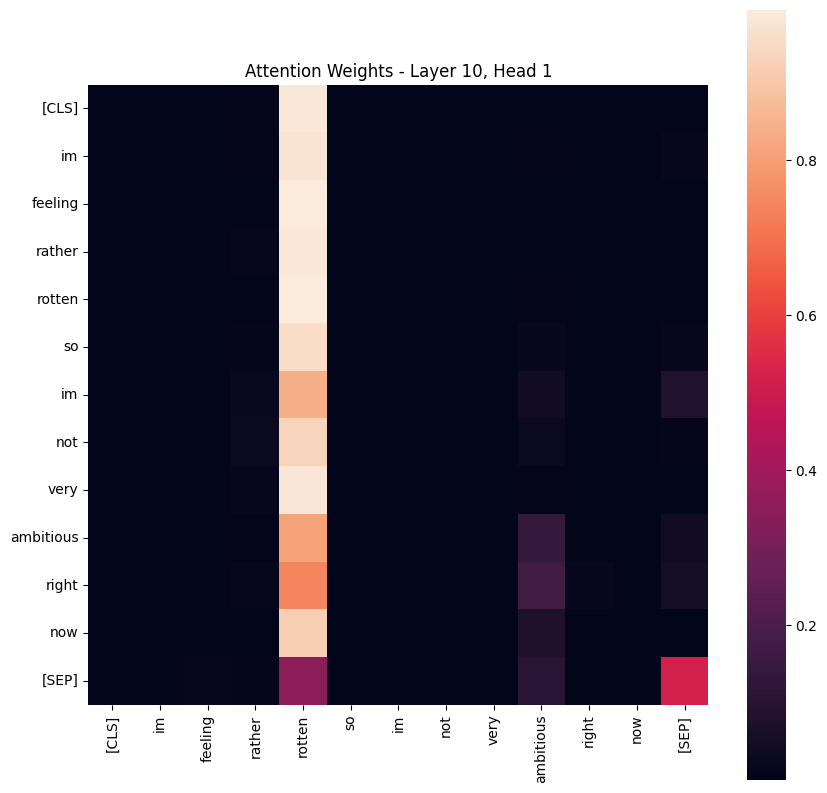

In [9]:
inputs = tokenizer(correctly_predicted_docs[0], return_tensors="pt", max_length=64, padding=True, truncation=True)
outputs = model(**inputs.to("cuda"))
attention = outputs[-1]  # The attentions are the last output of the model
import matplotlib.pyplot as plt
import seaborn as sns

# Choose which layer and head to visualize
layer = 9
head = 0

# Get the attention weights for the specified layer and head
attention_weights = attention[layer][0, head].cpu().detach().numpy()

# Set up labels for each token
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

# Plot
plt.figure(figsize=(10, 10))
sns.heatmap(attention_weights, xticklabels=tokens, yticklabels=tokens, square=True)
plt.title(f'Attention Weights - Layer {layer + 1}, Head {head + 1}')
plt.show()


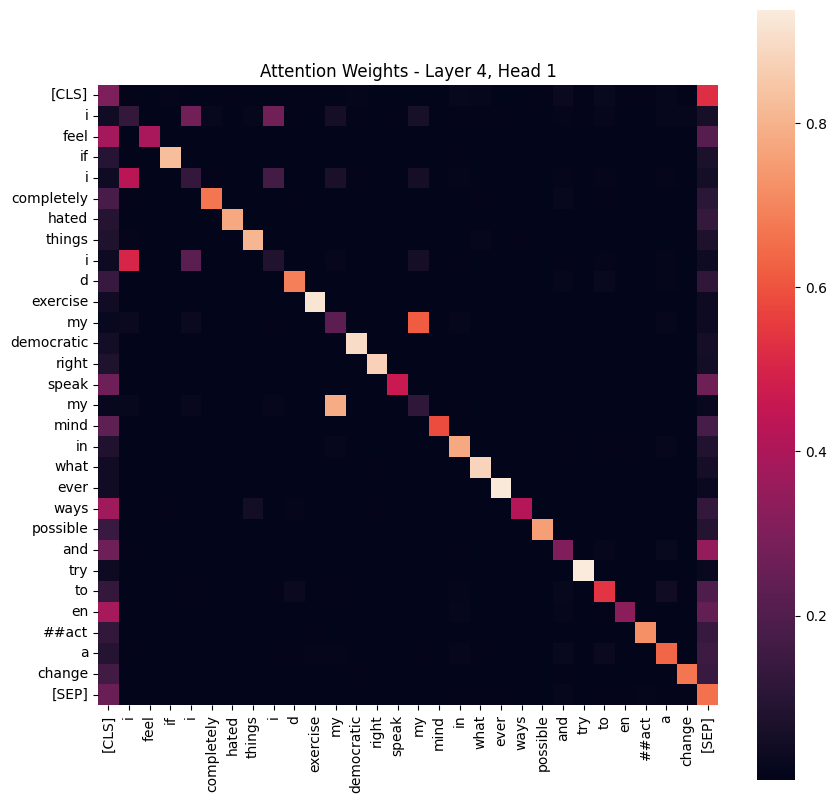

In [10]:
inputs = tokenizer(incorrectly_predicted_docs[0], return_tensors="pt", max_length=64, padding=True, truncation=True)
outputs = model(**inputs.to("cuda"))
attention = outputs[-1]  # The attentions are the last output of the model
import matplotlib.pyplot as plt
import seaborn as sns

# Choose which layer and head to visualize
layer = 3
head = 0

# Get the attention weights for the specified layer and head
attention_weights = attention[layer][0, head].cpu().detach().numpy()

# Set up labels for each token
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

# Plot
plt.figure(figsize=(10, 10))
sns.heatmap(attention_weights, xticklabels=tokens, yticklabels=tokens, square=True)
plt.title(f'Attention Weights - Layer {layer + 1}, Head {head + 1}')
plt.show()


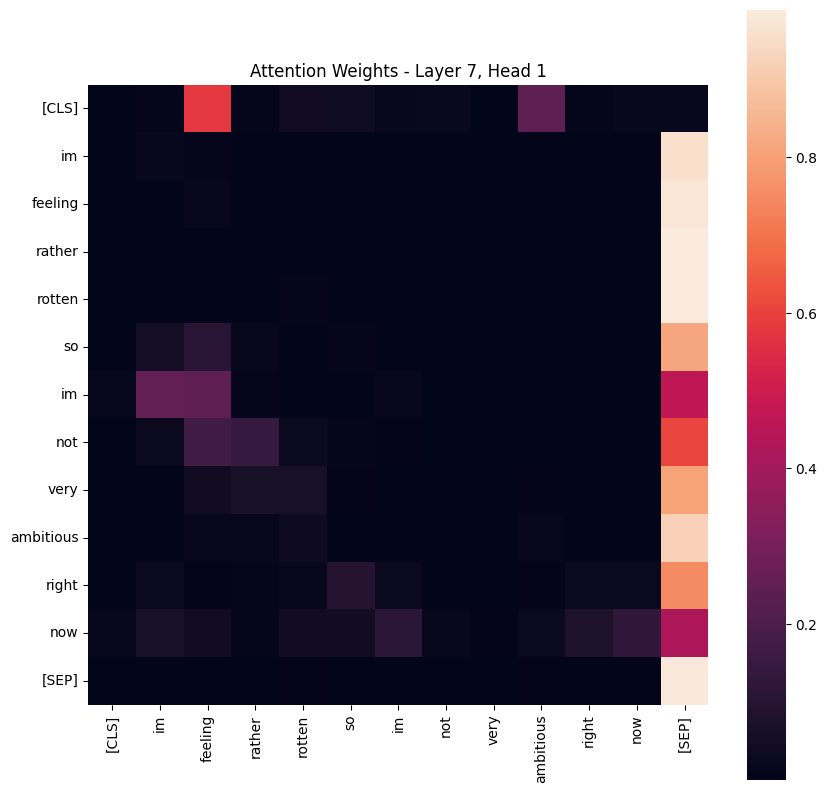

In [11]:
inputs = tokenizer(correctly_predicted_docs[0], return_tensors="pt", max_length=64, padding=True, truncation=True)
outputs = model(**inputs.to("cuda"))
attention = outputs[-1]  # The attentions are the last output of the model
import matplotlib.pyplot as plt
import seaborn as sns

# Choose which layer and head to visualize
layer = 6
head = 0

# Get the attention weights for the specified layer and head
attention_weights = attention[layer][0, head].cpu().detach().numpy()

# Set up labels for each token
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

# Plot
plt.figure(figsize=(10, 10))
sns.heatmap(attention_weights, xticklabels=tokens, yticklabels=tokens, square=True)
plt.title(f'Attention Weights - Layer {layer + 1}, Head {head + 1}')
plt.show()


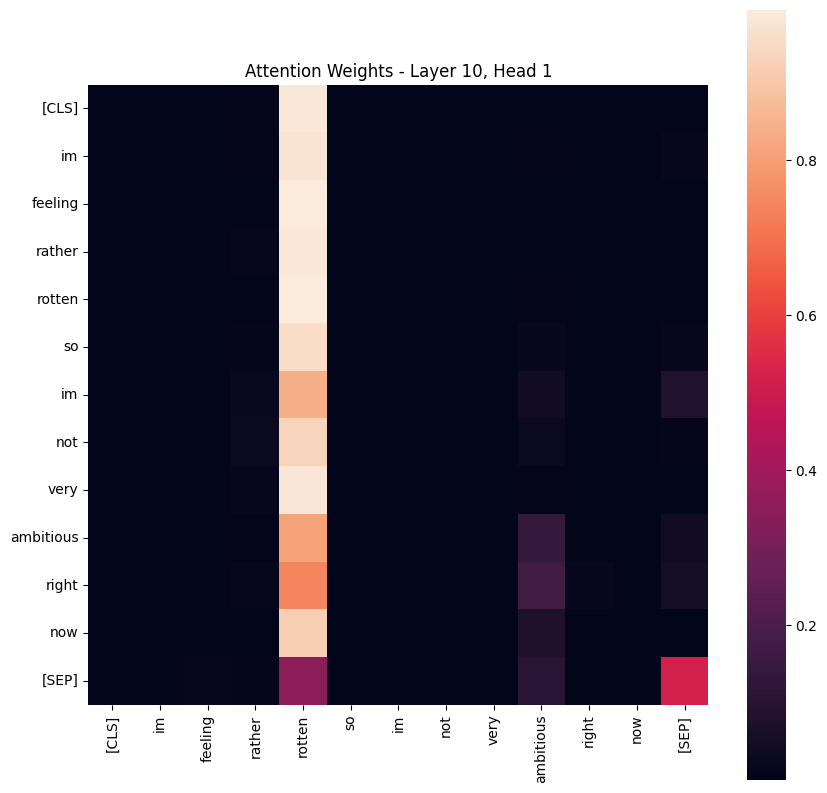

In [12]:
inputs = tokenizer(correctly_predicted_docs[0], return_tensors="pt", max_length=64, padding=True, truncation=True)
outputs = model(**inputs.to("cuda"))
attention = outputs[-1]  # The attentions are the last output of the model
import matplotlib.pyplot as plt
import seaborn as sns

# Choose which layer and head to visualize
layer = 9
head = 0

# Get the attention weights for the specified layer and head
attention_weights = attention[layer][0, head].cpu().detach().numpy()

# Set up labels for each token
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

# Plot
plt.figure(figsize=(10, 10))
sns.heatmap(attention_weights, xticklabels=tokens, yticklabels=tokens, square=True)
plt.title(f'Attention Weights - Layer {layer + 1}, Head {head + 1}')
plt.show()


In [ ]:
trainer.evaluate(tokenized_datasets['test'])

ALL Layers Fine-tuning of BERT Model

In [1]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset

from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def compute_metrics(pred):
    labels = pred.label_ids
    logits = pred.predictions[0]  # Extract logits
    preds = logits.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }


# Load the dataset
dataset = load_dataset('emotion')

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bhadresh-savani/bert-base-uncased-emotion')

# Function to tokenize the data
def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True, max_length=64)

# Apply tokenization to all splits
tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Load BERT model
model = BertForSequenceClassification.from_pretrained(
    'bhadresh-savani/bert-base-uncased-emotion',
    num_labels=len(dataset['train'].features['label'].names),
    output_attentions=True,
    output_hidden_states=False,
)

# Unfreeze all the parameters
for param in model.base_model.parameters():
    param.requires_grad = True

# Training Arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=32,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()
#train_results = trainer.evaluate(tokenized_datasets['train'])
#print(train_results)


Step,Training Loss
10,0.035500
20,0.043100
30,0.068300
40,0.056800
50,0.038500
60,0.079400
70,0.086400
80,0.051700
90,0.040800
100,0.057000


TrainOutput(global_step=1500, training_loss=0.09388936893145243, metrics={'train_runtime': 560.4483, 'train_samples_per_second': 85.646, 'train_steps_per_second': 2.676, 'total_flos': 1578723028992000.0, 'train_loss': 0.09388936893145243, 'epoch': 3.0})

In [2]:
import numpy as np
predictions=trainer.predict(tokenized_datasets['test'])
predicted_labels = np.argmax(predictions.predictions[0], axis=-1)
actual_labels = predictions.label_ids

In [3]:
correctly_predicted_docs = []
incorrectly_predicted_docs = []

for i in range(len(actual_labels)):
    if predicted_labels[i] == actual_labels[i]:
        correctly_predicted_docs.append(dataset['test']['text'][i])
    else:
        incorrectly_predicted_docs.append(dataset['test']['text'][i])

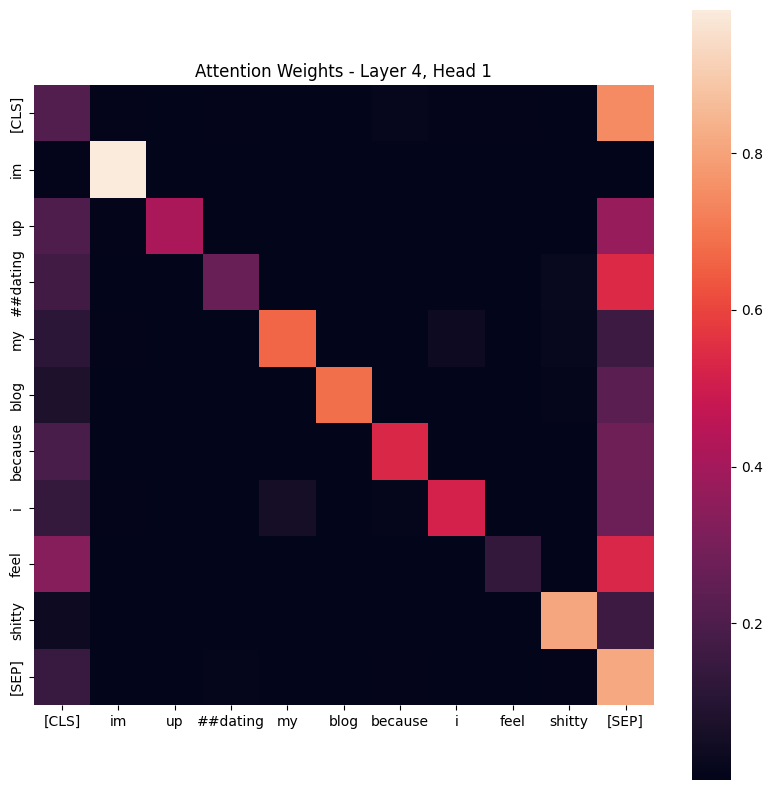

In [7]:
inputs = tokenizer(correctly_predicted_docs[1], return_tensors="pt", max_length=64, padding=True, truncation=True)
outputs = model(**inputs.to("cuda"))
attention = outputs[-1]  # The attentions are the last output of the model
import matplotlib.pyplot as plt
import seaborn as sns

# Choose which layer and head to visualize
layer = 3
head = 0

# Get the attention weights for the specified layer and head
attention_weights = attention[layer][0, head].cpu().detach().numpy()

# Set up labels for each token
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

# Plot
plt.figure(figsize=(10, 10))
sns.heatmap(attention_weights, xticklabels=tokens, yticklabels=tokens, square=True)
plt.title(f'Attention Weights - Layer {layer + 1}, Head {head + 1}')
plt.show()


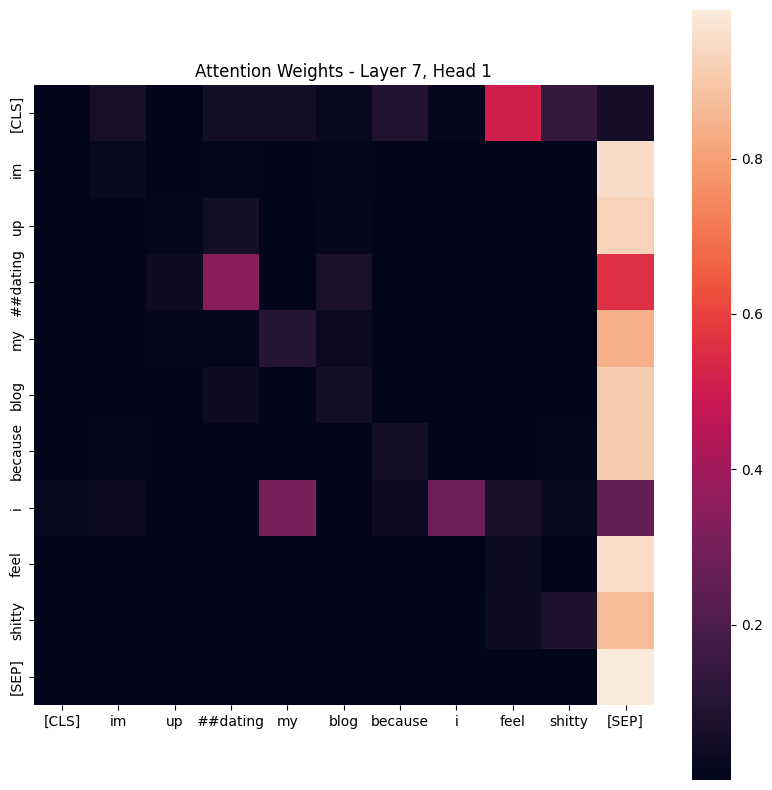

In [9]:
inputs = tokenizer(correctly_predicted_docs[1], return_tensors="pt", max_length=64, padding=True, truncation=True)
outputs = model(**inputs.to("cuda"))
attention = outputs[-1]  # The attentions are the last output of the model
import matplotlib.pyplot as plt
import seaborn as sns

# Choose which layer and head to visualize
layer = 6
head = 0

# Get the attention weights for the specified layer and head
attention_weights = attention[layer][0, head].cpu().detach().numpy()

# Set up labels for each token
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

# Plot
plt.figure(figsize=(10, 10))
sns.heatmap(attention_weights, xticklabels=tokens, yticklabels=tokens, square=True)
plt.title(f'Attention Weights - Layer {layer + 1}, Head {head + 1}')
plt.show()


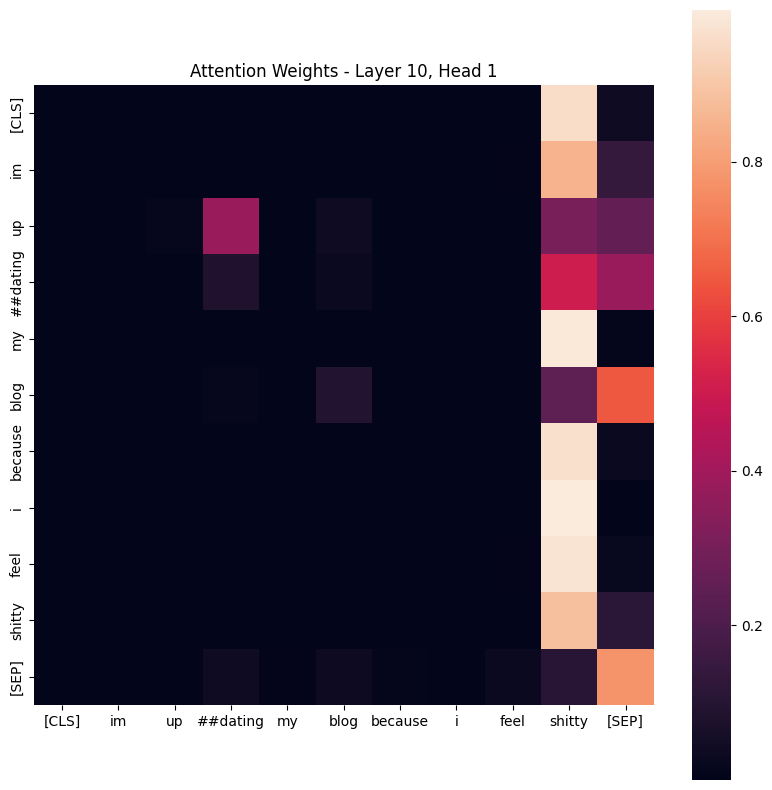

In [10]:
inputs = tokenizer(correctly_predicted_docs[1], return_tensors="pt", max_length=64, padding=True, truncation=True)
outputs = model(**inputs.to("cuda"))
attention = outputs[-1]  # The attentions are the last output of the model
import matplotlib.pyplot as plt
import seaborn as sns

# Choose which layer and head to visualize
layer = 9
head = 0

# Get the attention weights for the specified layer and head
attention_weights = attention[layer][0, head].cpu().detach().numpy()

# Set up labels for each token
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

# Plot
plt.figure(figsize=(10, 10))
sns.heatmap(attention_weights, xticklabels=tokens, yticklabels=tokens, square=True)
plt.title(f'Attention Weights - Layer {layer + 1}, Head {head + 1}')
plt.show()


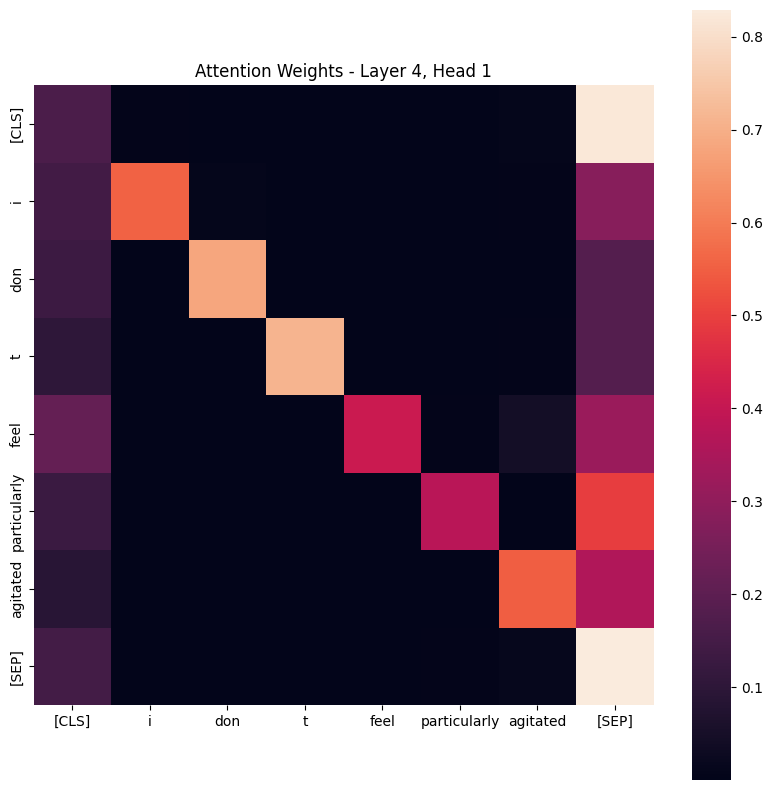

In [11]:
inputs = tokenizer(incorrectly_predicted_docs[1], return_tensors="pt", max_length=64, padding=True, truncation=True)
outputs = model(**inputs.to("cuda"))
attention = outputs[-1]  # The attentions are the last output of the model
import matplotlib.pyplot as plt
import seaborn as sns

# Choose which layer and head to visualize
layer = 3
head = 0

# Get the attention weights for the specified layer and head
attention_weights = attention[layer][0, head].cpu().detach().numpy()

# Set up labels for each token
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

# Plot
plt.figure(figsize=(10, 10))
sns.heatmap(attention_weights, xticklabels=tokens, yticklabels=tokens, square=True)
plt.title(f'Attention Weights - Layer {layer + 1}, Head {head + 1}')
plt.show()


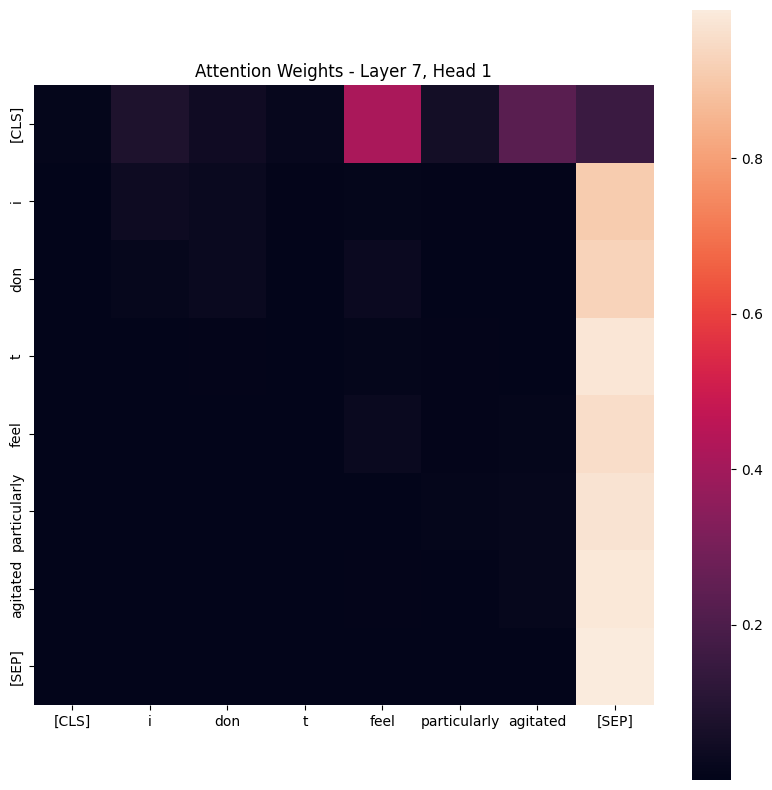

In [12]:
inputs = tokenizer(incorrectly_predicted_docs[1], return_tensors="pt", max_length=64, padding=True, truncation=True)
outputs = model(**inputs.to("cuda"))
attention = outputs[-1]  # The attentions are the last output of the model
import matplotlib.pyplot as plt
import seaborn as sns

# Choose which layer and head to visualize
layer = 6
head = 0

# Get the attention weights for the specified layer and head
attention_weights = attention[layer][0, head].cpu().detach().numpy()

# Set up labels for each token
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

# Plot
plt.figure(figsize=(10, 10))
sns.heatmap(attention_weights, xticklabels=tokens, yticklabels=tokens, square=True)
plt.title(f'Attention Weights - Layer {layer + 1}, Head {head + 1}')
plt.show()


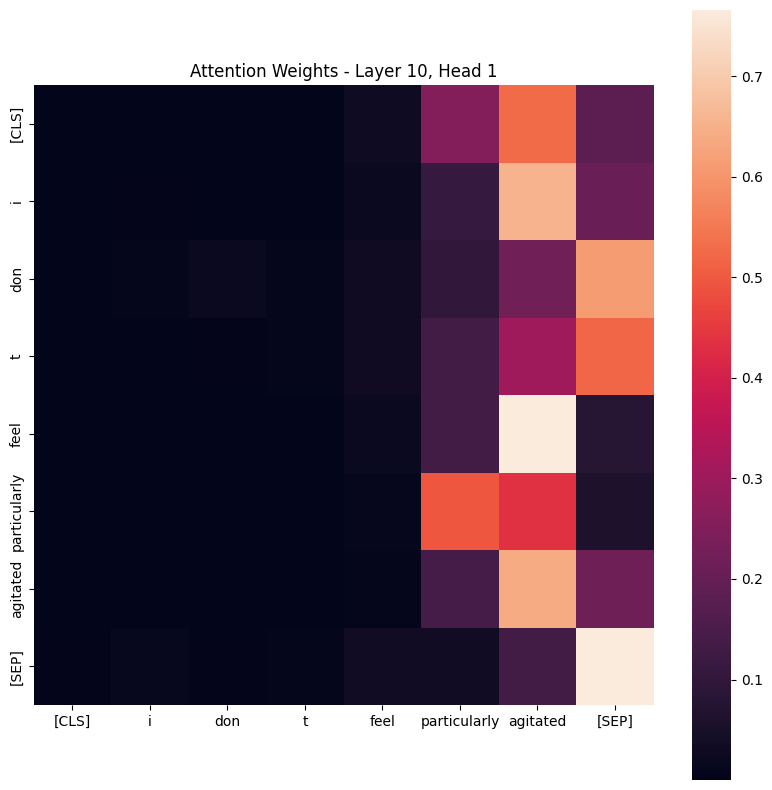

In [13]:
inputs = tokenizer(incorrectly_predicted_docs[1], return_tensors="pt", max_length=64, padding=True, truncation=True)
outputs = model(**inputs.to("cuda"))
attention = outputs[-1]  # The attentions are the last output of the model
import matplotlib.pyplot as plt
import seaborn as sns

# Choose which layer and head to visualize
layer = 9
head = 0

# Get the attention weights for the specified layer and head
attention_weights = attention[layer][0, head].cpu().detach().numpy()

# Set up labels for each token
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

# Plot
plt.figure(figsize=(10, 10))
sns.heatmap(attention_weights, xticklabels=tokens, yticklabels=tokens, square=True)
plt.title(f'Attention Weights - Layer {layer + 1}, Head {head + 1}')
plt.show()


In [ ]:
trainer.evaluate(tokenized_datasets['test'])

{'eval_loss': 0.24131876230239868,
 'eval_accuracy': 0.929,
 'eval_f1': 0.9299769166370812,
 'eval_precision': 0.9319262717666557,
 'eval_recall': 0.929,
 'eval_runtime': 16.4176,
 'eval_samples_per_second': 121.82,
 'eval_steps_per_second': 15.228,
 'epoch': 3.0}

Evaluation on Pre-trained BERT Model

In [11]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset

from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def compute_metrics(pred):
    labels = pred.label_ids
    logits = pred.predictions[0]  # Extract logits
    preds = logits.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }


# Load the dataset
dataset = load_dataset('emotion')

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bhadresh-savani/bert-base-uncased-emotion')

# Function to tokenize the data
def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True, max_length=64)

# Apply tokenization to all splits
tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Load BERT model
model = BertForSequenceClassification.from_pretrained(
    'bhadresh-savani/bert-base-uncased-emotion',
    num_labels=len(dataset['train'].features['label'].names),
    output_attentions=True,
    output_hidden_states=False,
)

# Unfreeze all the parameters
for param in model.base_model.parameters():
    param.requires_grad = False

# Training Arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=32,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    compute_metrics=compute_metrics,
)


train_results = trainer.evaluate(tokenized_datasets['test'])
print(train_results)


{'eval_loss': 0.17309783399105072, 'eval_accuracy': 0.9265, 'eval_f1': 0.9262425173620311, 'eval_precision': 0.9265082039990273, 'eval_recall': 0.9265, 'eval_runtime': 25.956, 'eval_samples_per_second': 77.054, 'eval_steps_per_second': 9.632}
